In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sqlite3


In [7]:
df=pd.read_csv("sales_data_sample.csv", encoding='latin1')
conn=sqlite3.connect("sales_database.db")
cursor=conn.cursor()
df.to_sql('sales_data',conn,if_exists="replace")
df


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [8]:
df=df.dropna()
df.columns.to_list()

['ORDERNUMBER',
 'QUANTITYORDERED',
 'PRICEEACH',
 'ORDERLINENUMBER',
 'SALES',
 'ORDERDATE',
 'STATUS',
 'QTR_ID',
 'MONTH_ID',
 'YEAR_ID',
 'PRODUCTLINE',
 'MSRP',
 'PRODUCTCODE',
 'CUSTOMERNAME',
 'PHONE',
 'ADDRESSLINE1',
 'ADDRESSLINE2',
 'CITY',
 'STATE',
 'POSTALCODE',
 'COUNTRY',
 'TERRITORY',
 'CONTACTLASTNAME',
 'CONTACTFIRSTNAME',
 'DEALSIZE']

In [12]:
df=pd.read_sql_query("select PRODUCTCODE, QUANTITYORDERED,PRICEEACH,Sales, ORDERDATE,MONTH_ID,YEAR_ID,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME from sales_data order by PRODUCTCODE",conn)
df

,PRODUCTCODE,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,MONTH_ID,YEAR_ID,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME
0,S10_1678,30,95.70,2871.00,2/24/2003 0:00,2,2003,USA,Yu,Kwai
1,S10_1678,34,81.35,2765.90,5/7/2003 0:00,5,2003,France,Henriot,Paul
2,S10_1678,41,94.74,3884.34,7/1/2003 0:00,7,2003,France,Da Cunha,Daniel
3,S10_1678,45,83.26,3746.70,8/25/2003 0:00,8,2003,USA,Young,Julie
4,S10_1678,49,100.00,5205.27,10/10/2003 0:00,10,2003,USA,Brown,Julie
...,...,...,...,...,...,...,...,...,...,...
2818,S72_3212,20,100.00,2244.40,12/2/2004 0:00,12,2004,Spain,Freyre,Diego
2819,S72_3212,29,100.00,3978.51,1/31/2005 0:00,1,2005,Finland,Koskitalo,Pirkko
2820,S72_3212,43,100.00,5417.57,3/1/2005 0:00,3,2005,Spain,Freyre,Diego
2821,S72_3212,34,62.24,2116.16,3/28/2005 0:00,3,2005,France,Roulet,Annette


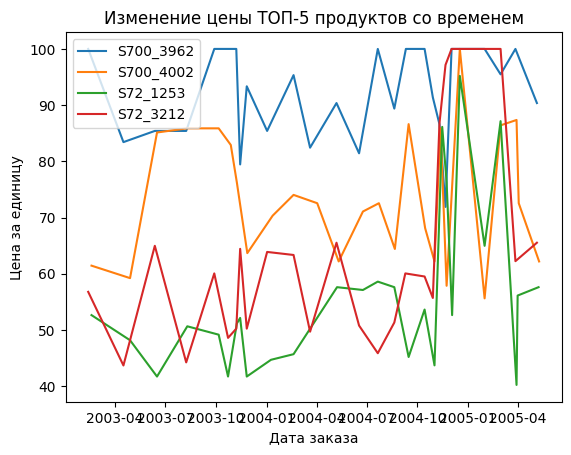

In [30]:
top_products = df['PRODUCTCODE'].tail(100).unique()

for product in top_products:
    product_data = df[df['PRODUCTCODE'] == product]
    plt.plot(product_data['ORDERDATE'], product_data['PRICEEACH'], label=product)

plt.xlabel('Дата заказа')
plt.ylabel('Цена за единицу')
plt.title('Изменение цены ТОП-5 продуктов со временем')
plt.legend()
plt.show()
